In [1]:
# load csv file using np
import numpy as np
import pandas as pd

filename = "AAPL_intraday.csv"
filepath = "./dataset/" + filename
data = pd.read_csv(filepath)

print(data.head())


                  date       close   volume
0  2023-10-19 09:30:00  108.860001  17769.0
1  2023-10-19 09:31:00  109.320000  17930.0
2  2023-10-19 09:32:00  109.580002   6670.0
3  2023-10-19 09:33:00  109.580002   6670.0
4  2023-10-19 09:34:00  109.995003  16569.0


In [8]:
def calculate_differences(csv_file, isPercentage=False):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # extract first column
    first_column = df.iloc[:, 0]

    # remove first column
    df = df.iloc[:, 1:]

    # Calculate the differences
    if isPercentage:
        differences = df.pct_change()
    else:
        differences = df.diff()
    

    # Add the first column back to the DataFrame
    differences.insert(0, 'timestamp', first_column)

    # remove first row
    differences = differences.iloc[1:, :]

    # Return the DataFrame with differences
    return differences

In [9]:
data_diff = calculate_differences(filepath)
data_diff_pct = calculate_differences(filepath, True)


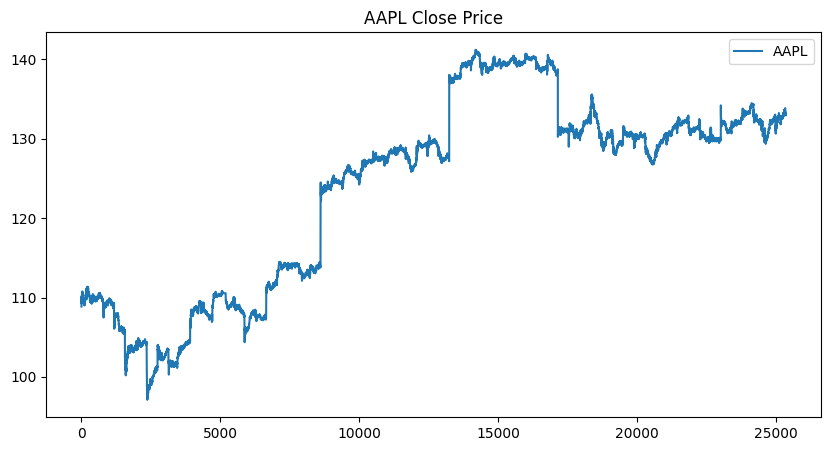

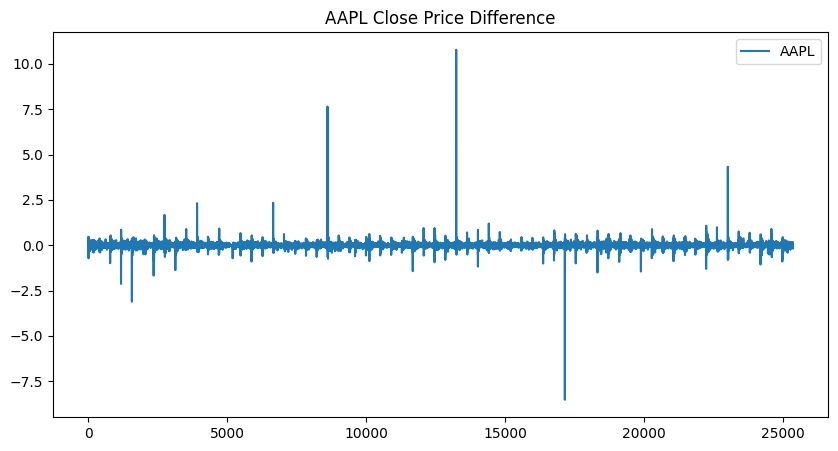

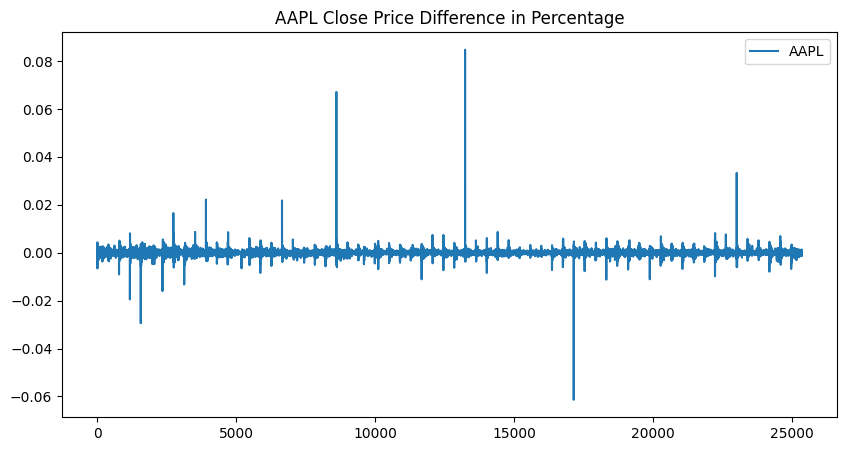

In [10]:
# plot both in seperate graph

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(data['close'], label='AAPL')
plt.title('AAPL Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(data_diff['close'], label='AAPL')
plt.title('AAPL Close Price Difference')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(data_diff_pct['close'], label='AAPL')
plt.title('AAPL Close Price Difference in Percentage')
plt.legend()
plt.show()